In [1]:
import pandas as pd
from ShaDoC import generate
from tqdm import tqdm
import time
import lib.global_settings as settings
import os

In [2]:
# df = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results_new.csv')
df = pd.read_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results_context.csv"))
# df = df[["Package", "Java API", "Question", "SISE", "JADEITE", "CROKAGE", "ADECK"]]
df.head()

,Package,Java API,Question,SISE,JADEITE,CROKAGE,ADECK,DocChameleon,SISE_context_relevancy,CROKAGE_context_relevancy,ADECK_relevancy,DocChameleon_context_relevancy
0,applet,Applet,Loading and displaying local Images in Java Ap...,<p>If you re still seeing an Illegal Escape C...,Most common way to construct:\nClass appletCla...,It's likely the image can't be accessed from i...,*******************usage scenario 1***********...,"['""""""How can I display an image in the Applet?...",0.166667,1.000000,0.078125,0.968889
1,applet,Applet,Classloader in Applet: Cant access files,<p>If you re still seeing an Illegal Escape C...,Most common way to construct:\nClass appletCla...,Classloader hierarchy\nWhenever a new JVM is s...,*******************usage scenario 1***********...,"['""""""Classloader in Applet: Can\'t access file...",0.166667,0.388889,0.078125,1.000000
2,applet,Applet,How to access a file in a Java Applet?,<p>If you re still seeing an Illegal Escape C...,Most common way to construct:\nClass appletCla...,You need to wrap your code in AccessController...,*******************usage scenario 1***********...,"['""""""Accessing files from a Java Applet\n\nI\'...",0.166667,0.333333,0.078125,0.280000
3,swing,JPanel,how to set JFrame background transparent but J...,<p>If you are using JPanels then are probably...,Most common way to construct:\nJPanel panel = ...,I found another solution.\n\nSet the backgroun...,*******************usage scenario 1***********...,"['""""""how to set JFrame background transparent ...",0.072464,1.000000,0.074627,1.000000
4,swing,JPanel,How to set a transparent background of JPanel?,<p>If you are using JPanels then are probably...,Most common way to construct:\nJPanel panel = ...,You could use setOpaque() to make the backgrou...,*******************usage scenario 1***********...,"['""""""I want to create a semi-transparent JPane...",0.072464,0.136364,0.074627,0.437500


In [3]:
half1 = df.iloc[:len(df)//2]
half2 = df.iloc[len(df)//2:]
print(half1.shape)
print(half2.shape)

(25, 7)
(25, 7)


#### Explanation Generation

In [ ]:
# values1 = []
# for index, row in tqdm(half2.iterrows(), total=half2.shape[0]):
#     solution = generate.generate_explanation(row['Question'])
#     time.sleep(4)
#     values1.append(solution)

# half2['DocChameleon_explanation'] = values1
# half2.to_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results_2.csv"), index=False)

#### Code Example Generation

In [ ]:
# values1 = []
# for index, row in tqdm(df.iterrows(), total=df.shape[0]):
#     solution = generate.generate_code(row['Question'])
#     time.sleep(4)
#     generation = solution[0]
#     answer = "\n".join([generation.prefix, generation.imports, generation.code])
#     values1.append(answer)

# df['DocChameleon_code'] = values1
# df.to_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results_2.csv"), index=False)


In [22]:
half1 = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative0.csv')
half2 = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative3.csv')

In [ ]:
# values2 = []
# for index, row in tqdm(half2.iterrows(), total=half2.shape[0]):
#     result = r.context_retrieval(row['Question'])
#     values2.append(str(result[0]))

# half2['DocChameleon'] = values2
# half2.to_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative2.csv', index=False)

In [ ]:
# result_df = pd.concat([half1, half2], axis=0)
# result_df.reset_index(drop=True, inplace=True)
# result_df.to_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results.csv', index=False)
result_df = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results_new.csv')
result_df

## Readability Score

In [129]:
import textstat

values = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    flesch_reading_ease_score = textstat.flesch_reading_ease(row["DocChameleon_code"])
    values.append(flesch_reading_ease_score)

df["DocChameleon_code_flesch"] = values

100%|██████████| 50/50 [00:00<00:00, 437.17it/s]


In [ ]:
from radon.metrics import mi_visit
import re

values = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    cleaned_text = re.sub(r'""".*?"""', '', row["ADECK"], flags=re.DOTALL)
    maintainability_index = mi_visit(cleaned_text, multi=False)
    values.append(maintainability_index)

df["ADECK_maintainability"] = values

## Contenxt Relevancy

In [5]:
from ragas.metrics import context_relevancy

import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/.env")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") 

from langchain_openai import ChatOpenAI
agent_llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

from ragas import evaluate
from datasets import Dataset

def compute_context_relevancy(df):
    df['DocChameleon_explanation'] = df['DocChameleon_explanation'].apply(lambda x: [str(x)])
    
    data = {
    "question": df['Question'],
    "contexts": df['DocChameleon_explanation']
    }
    metrics = [context_relevancy]

    # # Create a Dataset object
    dataset = Dataset.from_dict(data)
    eval = evaluate(dataset, metrics=metrics, llm=agent_llm)
    res = eval.to_pandas()
    return res


result = compute_context_relevancy(df)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
def merge_and_rename(df1, df2, column_to_merge, new_column_name):
    merged_df = df1.join(df2[[column_to_merge]], how='left')
    merged_df = merged_df.rename(columns={column_to_merge: new_column_name})
    return merged_df

result_df = merge_and_rename(df, result, "context_relevancy", "DocChameleon_explanation_relevancy")
result_df
# result_df.to_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results.csv"),index=False)

In [105]:
df1 = pd.read_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results_1.csv"))
df2 = pd.read_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results_2.csv"))

df = pd.concat([df1, df2], ignore_index=True)
df.to_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results.csv"),index=False)

### Analysis

#### Explanations

In [3]:
from scipy.stats import f_oneway
results = pd.read_csv(os.path.join(settings.DATA_PATH, "final_data/quantitative_results_context.csv"))
results.head()

,Package,Java API,Question,SISE,JADEITE,CROKAGE,ADECK,DocChameleon,SISE_context_relevancy,CROKAGE_context_relevancy,ADECK_relevancy,DocChameleon_context_relevancy
0,applet,Applet,Loading and displaying local Images in Java Ap...,<p>If you re still seeing an Illegal Escape C...,Most common way to construct:\nClass appletCla...,It's likely the image can't be accessed from i...,*******************usage scenario 1***********...,"['""""""How can I display an image in the Applet?...",0.166667,1.000000,0.078125,0.968889
1,applet,Applet,Classloader in Applet: Cant access files,<p>If you re still seeing an Illegal Escape C...,Most common way to construct:\nClass appletCla...,Classloader hierarchy\nWhenever a new JVM is s...,*******************usage scenario 1***********...,"['""""""Classloader in Applet: Can\'t access file...",0.166667,0.388889,0.078125,1.000000
2,applet,Applet,How to access a file in a Java Applet?,<p>If you re still seeing an Illegal Escape C...,Most common way to construct:\nClass appletCla...,You need to wrap your code in AccessController...,*******************usage scenario 1***********...,"['""""""Accessing files from a Java Applet\n\nI\'...",0.166667,0.333333,0.078125,0.280000
3,swing,JPanel,how to set JFrame background transparent but J...,<p>If you are using JPanels then are probably...,Most common way to construct:\nJPanel panel = ...,I found another solution.\n\nSet the backgroun...,*******************usage scenario 1***********...,"['""""""how to set JFrame background transparent ...",0.072464,1.000000,0.074627,1.000000
4,swing,JPanel,How to set a transparent background of JPanel?,<p>If you are using JPanels then are probably...,Most common way to construct:\nJPanel panel = ...,You could use setOpaque() to make the backgrou...,*******************usage scenario 1***********...,"['""""""I want to create a semi-transparent JPane...",0.072464,0.136364,0.074627,0.437500


In [4]:
anova_result = f_oneway(results['ADECK_relevancy'], results['SISE_context_relevancy'], results['CROKAGE_context_relevancy'], results['DocChameleon_context_relevancy'])
print(f'ANOVA result: {anova_result}')

ANOVA result: F_onewayResult(statistic=47.31158945190873, pvalue=4.784355181417268e-23)


In [6]:
from scipy.stats import mannwhitneyu
import pingouin as pg

def mann_whitney(tool1, tool2, group1, group2):
    print(f"{tool1} vs {tool2}")
    print(f"{'='*10}")

    stat, p_value = mannwhitneyu(group1, group2)
    effect_size = pg.compute_effsize(group2, group1, eftype='cohen')
    print(f'Mann-Whitney U statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'effect-size: {effect_size}\n\n')

mann_whitney("ADECK", "SISE", results['ADECK_relevancy'], results['SISE_context_relevancy'])
mann_whitney("ADECK", "CROKAGE", results['ADECK_relevancy'], results['CROKAGE_context_relevancy'])
mann_whitney("ADECK", "DocChameleon", results['ADECK_relevancy'], results['DocChameleon_context_relevancy'])

mann_whitney("SISE", "CROKAGE", results['SISE_context_relevancy'], results['CROKAGE_context_relevancy'])
mann_whitney("SISE", "DocChameleon", results['SISE_context_relevancy'], results['DocChameleon_context_relevancy'])
mann_whitney("CROKAGE", "DocChameleon", results['CROKAGE_context_relevancy'], results['DocChameleon_context_relevancy'])

ADECK vs SISE
Mann-Whitney U statistic: 893.5
p-value: 0.013413717609391657
effect-size: 0.2665533121897899


ADECK vs CROKAGE
Mann-Whitney U statistic: 336.0
p-value: 2.5401053213894996e-10
effect-size: 1.421051197258846


ADECK vs DocChameleon
Mann-Whitney U statistic: 210.0
p-value: 5.476714335399692e-13
effect-size: 2.0515652637249806


SISE vs CROKAGE
Mann-Whitney U statistic: 434.0
p-value: 1.6956840860946902e-08
effect-size: 1.1917581307910359


SISE vs DocChameleon
Mann-Whitney U statistic: 303.0
p-value: 5.438852715742657e-11
effect-size: 1.8193442158025868


CROKAGE vs DocChameleon
Mann-Whitney U statistic: 908.0
p-value: 0.01697968943905978
effect-size: 0.5470302422261624




In [5]:
def stats(tool, column):
    print(f"{tool}")
    print(f"{'='*10}")
    mean = column.mean()
    max = column.max()
    min = column.min()
    print(f"\tAverage: {mean}")
    print(f"\tMax: {max}")
    print(f"\tMin: {min}")

stats("ADECK", results['ADECK_relevancy'])
stats("SISE", results['SISE_context_relevancy'])
stats("CROKAGE", results['CROKAGE_context_relevancy'])
stats("DocChameleon", results['DocChameleon_context_relevancy'])

ADECK
	Average: 0.16789505425419995
	Max: 1.0
	Min: 0.0
SISE
	Average: 0.2309590537224
	Max: 1.0
	Min: 0.0
CROKAGE
	Average: 0.5621352659
	Max: 1.0
	Min: 0.111111111
DocChameleon
	Average: 0.7324928089000001
	Max: 1.0
	Min: 0.096153846


/var/folders/x7/c7r5kc051js_fytcq8jbvt040000gp/T/ipykernel_7821/199586865.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels)


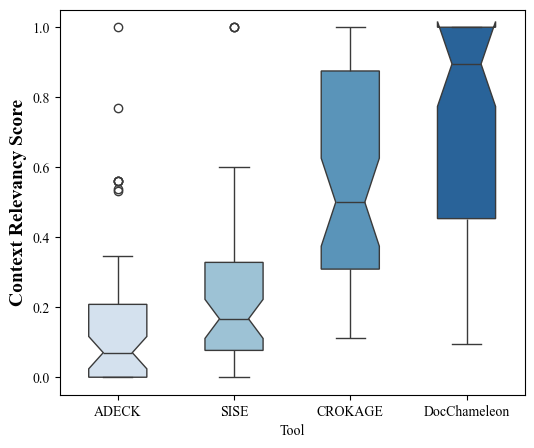

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] = 'Times New Roman'
# sns.set_theme()

df_selected = results[['ADECK_relevancy', 'SISE_context_relevancy', 'CROKAGE_context_relevancy', 'DocChameleon_context_relevancy']]
df_melted = df_selected.melt(var_name='Tool', value_name='Relevancy')

# Create notched box plots
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='Tool', y='Relevancy', hue='Tool',data=df_melted, notch=True, width=0.5, palette='Blues')
custom_labels = ['ADECK', 'SISE', 'CROKAGE', 'DocChameleon']
ax.set_xticklabels(custom_labels)
# plt.xticks(rotation=15)

# Add title and labels
# plt.title('Relevancy of information retrieved from Stack Overflow', fontsize=14, fontweight='bold')
# plt.xlabel('API Documentation Augmentation Tool', fontsize=14, fontweight='bold')

plt.ylabel('Context Relevancy Score', fontsize=14, fontweight='bold')
plt.savefig('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/figures/context_relevancy.pdf')

# Show the plot
plt.show()

#### For code

In [49]:
anova_result = f_oneway(results['ADECK_relevancy'], results['CROKAGE_relevancy'], results['DocChameleon_code_relevancy'])
print(f'ANOVA result: {anova_result}')

ANOVA result: F_onewayResult(statistic=155.24330052993767, pvalue=5.754574999626896e-37)


In [50]:
stats("ADECK", results['ADECK_relevancy'])
stats("CROKAGE", results['CROKAGE_relevancy'])
stats("DocChameleon", results['DocChameleon_code_relevancy'])

ADECK
	Average: 0.071853679381
	Max: 1.0
	Min: 0.0
CROKAGE
	Average: 0.5621352659
	Max: 1.0
	Min: 0.111111111
DocChameleon
	Average: 0.8514730158779998
	Max: 1.0
	Min: 0.2


In [42]:
from scipy.stats import mannwhitneyu
import pingouin as pg

def mann_whitney(tool1, tool2, group1, group2):
    print(f"{tool1} vs {tool2}")
    print(f"{'='*10}")

    stat, p_value = mannwhitneyu(group1, group2)
    effect_size = pg.compute_effsize(group2, group1, eftype='cohen')
    print(f'Mann-Whitney U statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'effect-size: {effect_size}\n\n')

mann_whitney("ADECK", "CROKAGE", results['ADECK_relevancy'], results['CROKAGE_relevancy'])
mann_whitney("ADECK", "DocChameleon", results['ADECK_relevancy'], results['DocChameleon_code_relevancy'])
mann_whitney("CROKAGE", "DocChameleon", results['CROKAGE_relevancy'], results['DocChameleon_code_relevancy'])

ADECK vs CROKAGE
Mann-Whitney U statistic: 77.0
p-value: 4.75055964700608e-16
effect-size: 1.9777820218101962


ADECK vs DocChameleon
Mann-Whitney U statistic: 42.0
p-value: 4.887141732044345e-17
effect-size: 4.841656530317678


CROKAGE vs DocChameleon
Mann-Whitney U statistic: 613.5
p-value: 8.233457383467957e-06
effect-size: 1.1555919086339443




/var/folders/x7/c7r5kc051js_fytcq8jbvt040000gp/T/ipykernel_870/4219612767.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels)


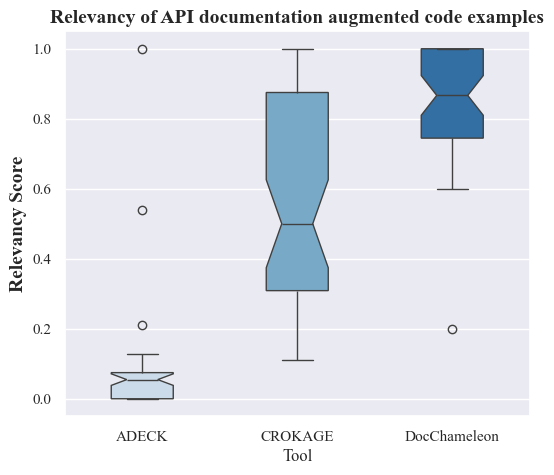

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] = 'Times New Roman'
# sns.set_theme()

df_selected = results[['ADECK_relevancy', 'CROKAGE_relevancy', 'DocChameleon_code_relevancy']]
df_melted = df_selected.melt(var_name='Tool', value_name='Relevancy')

# Create notched box plots
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='Tool', y='Relevancy', hue='Tool',data=df_melted, notch=True, width=0.4, palette='Blues')
custom_labels = ['ADECK', 'CROKAGE', 'DocChameleon']
ax.set_xticklabels(custom_labels)
# plt.xticks(rotation=15)

# Add title and labels
plt.title('Relevancy of API documentation augmented code examples', fontsize=14, fontweight='bold')
# plt.xlabel('API Documentation Augmentation Tool', fontsize=14, fontweight='bold')
plt.ylabel('Relevancy Score', fontsize=14, fontweight='bold')
plt.savefig('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/figures/code_relevancy.pdf')

# Show the plot
plt.show()